## Introduction to Pandas

Often data is stored in comma separated values (CSV) files. 
For the remainder of this lab, we'll be working with automobile data, where we've extracted relevant parts below. Note that CSV files can be output by any spreadsheet software, and are plain text, hence are a great way to share data. Pandas can also read excel format.



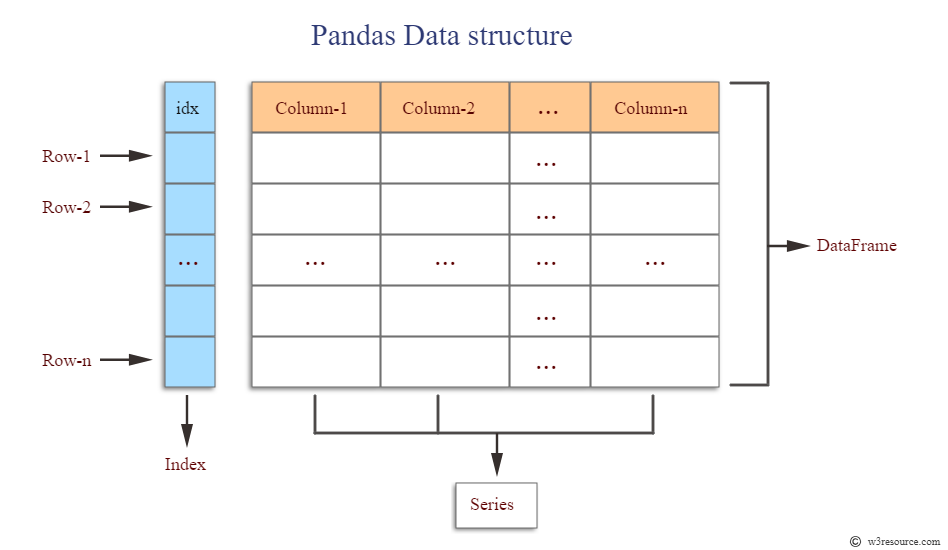

To use Pandas, we first need to import the `pandas` package:

In [1]:
import pandas as pd

### The Pandas Series Object

A Pandas ``Series`` is a one-dimensional array of indexed data. It is a one-dimensional labeled array capable of holding data of any type (integer, string, float, python objects, etc.). The axis labels are collectively called index. Pandas Series is nothing but a column in an excel sheet.
Labels need not be unique but must be a hashable type. The object supports both integer and label-based indexing and provides a host of methods for performing operations involving the index.

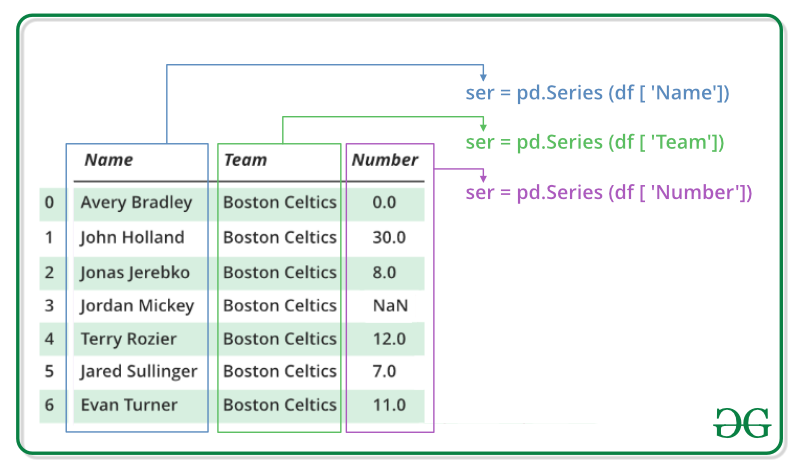

Reference: https://www.geeksforgeeks.org/python-pandas-series/


#### Create from list

Pandas series can be extracted from a dataframe, or they can be created from a list or array as follows:

In [1]:
import pandas as pd

x = [1,2,3]

pd.Series(x)

0    1
1    2
2    3
dtype: int64

In [2]:
pd.Series([1,2,3.5,'4',True])

0       1
1       2
2     3.5
3       4
4    True
dtype: object

In [3]:
data = pd.Series(
                 index=[1,2,5,6],
                 data=[0.25, 0.5, 0.75, 1.0])
data

1    0.25
2    0.50
5    0.75
6    1.00
dtype: float64

As we see in the output, the ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the ``values`` and ``index`` attributes.
The ``values`` are simply a familiar NumPy array:

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

The ``index`` is an array-like object of type ``pd.Index``, which we'll discuss in more detail momentarily.

In [9]:
data.index

Int64Index([1, 2, 5, 6], dtype='int64')

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [5]:
data

1    0.25
2    0.50
5    0.75
6    1.00
dtype: float64

In [6]:
data[1]

0.25

In [8]:
data.values[1]

0.5

In [14]:
data[5]

0.75

In [9]:
data[0:2]

1    0.25
2    0.50
dtype: float64

In [10]:
data

1    0.25
2    0.50
5    0.75
6    1.00
dtype: float64

In [11]:
data[1:7]

2    0.50
5    0.75
6    1.00
dtype: float64

In [12]:
data[1:5]

2    0.50
5    0.75
6    1.00
dtype: float64

In [13]:
data[6]

1.0

In [14]:
data[5:7]

Series([], dtype: float64)

In [15]:
data[1:3]

2    0.50
5    0.75
dtype: float64

#### Create from dictionary

In this way, you can think of a Pandas ``Series`` a bit like a specialization of a Python dictionary.
A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a ``Series`` is a structure which maps typed keys to a set of typed values.
This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas ``Series`` makes it much more efficient than Python dictionaries for certain operations.

The ``Series``-as-dictionary analogy can be made even more clear by constructing a ``Series`` object directly from a Python dictionary:

In [17]:
population_dict = {'California': 38332521,  #Key   Value
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}


population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [20]:
population.values

array([38332521, 26448193, 19651127, 19552860, 12882135], dtype=int64)

In [21]:
population.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

By default, a ``Series`` will be created where the index is drawn from the sorted keys.
From here, typical dictionary-style item access can be performed:

In [22]:
population['California']

38332521

Unlike a dictionary, though, the ``Series`` also supports array-style operations such as slicing:

In [18]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [24]:
population[1:3] # 3 exclusive 

Texas       26448193
New York    19651127
dtype: int64

In [26]:
population[0:4]  

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64

In [27]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [20]:
population['California':'Illinois']   # last is inclusive when string 

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

**Task** 


1- create comprehnsion dictionary 10 numbers (Key : value) number : square(number) 

2- create series using dictionary 

3- print range 5 to 9  (9 inclusive)

4- print index = 3

5- print index = 11

In [21]:
dictt = {x:x**2 for x in range (0,10)}
dictt

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

In [22]:
dict_s = pd.Series(dictt)
dict_s

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64

In [23]:
dict_s[5:10]

5    25
6    36
7    49
8    64
9    81
dtype: int64

In [25]:
dict_s[3]

9

In [26]:
dict_s[11]

KeyError: 11

### Pandas Data Frame
Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

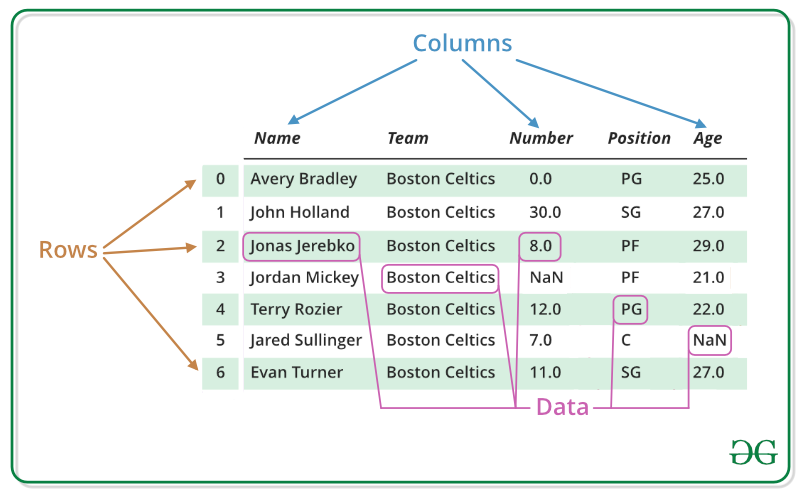

Reference: https://www.geeksforgeeks.org/python-pandas-dataframe/

#### From a single Series object

A ``DataFrame`` is a collection of ``Series`` objects, and a single-column ``DataFrame`` can be constructed from a single ``Series``:

In [26]:
pd.DataFrame()

""


In [28]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)

pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [34]:
stu_d = {'mah':5,
         'ahm':2.5,
         'kar':4}

stu_s  = pd.Series(
                    stu_d
                   )

stu_df = pd.DataFrame(
                      stu_s,
                      columns=['GPA']
                      )


stu_df.reset_index(inplace=True)
stu_df

,index,GPA
0,mah,5.0
1,ahm,2.5
2,kar,4.0


In [35]:
stu_df

,index,GPA
0,mah,5.0
1,ahm,2.5
2,kar,4.0


In [38]:
stu_df.rename(columns={'index':'Names'},inplace=True)

In [39]:
stu_df

,Names,GPA
0,mah,5.0
1,ahm,2.5
2,kar,4.0


#### From a list of dicts

Any list of dictionaries can be made into a ``DataFrame``.
We'll use a simple list comprehension to create some data:

In [ ]:
import pandas as pd

row1 = {'Name': 'Mahmoud' , 'Number': 1500 ,'Age': 28 }
row2 = {'Name': 'Ahmed'   , 'Number': 985 , 'Age': 35 }



In [ ]:
df1 = pd.DataFrame( [row1,row2] )
df1

,Name,Number,Age
0,Mahmoud,1500,28
1,Ahmed,985,35


task 

Create dataframe

3 rows 

3 columns

Name  Salary  City

In [ ]:
df1

,Name,Number,Age
0,Mahmoud,1500,28
1,Ahmed,985,35


In [ ]:
df1.shape

(2, 3)

In [ ]:
df1.dtypes

Name      object
Number     int64
Age        int64
dtype: object

### The Pandas Index Object

We have seen here that both the ``Series`` and ``DataFrame`` objects contain an explicit *index* that lets you reference and modify data.
This ``Index`` object is an interesting structure in itself, and it can be thought of either as an *immutable array* or as an *ordered set* (technically a multi-set, as ``Index`` objects may contain repeated values).
Those views have some interesting consequences in the operations available on ``Index`` objects.
As a simple example, let's construct an ``Index`` from a list of integers:

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

#### Index as immutable array

The ``Index`` in many ways operates like an array.
For example, we can use standard Python indexing notation to retrieve values or slices:

In [ ]:
ind[1]

3

``Index`` objects also have many of the attributes familiar from NumPy arrays:

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


One difference between ``Index`` objects and NumPy arrays is that indices are immutable–that is, they cannot be modified via the normal means:

In [ ]:
# will raise error
ind[1] = 0

TypeError: Index does not support mutable operations

This immutability makes it safer to share indices between multiple ``DataFrame``s and arrays, without the potential for side effects from inadvertent index modification.

#### Indexers: loc, iloc, and ix

These slicing and indexing conventions can be a source of confusion.
For example, if your ``Series`` has an explicit integer index, an indexing operation such as ``data[1]`` will use the explicit indices, while a slicing operation like ``data[1:3]`` will use the implicit Python-style index.

In [ ]:
data = pd.Series(['amna', 'mona', 'zeinab','manhal'], index=[1, 3, 5,6])
data

1      amna
3      mona
5    zeinab
6    manhal
dtype: object

In [ ]:
# explicit index when indexing
data[1]

'amna'

In [ ]:
# implicit index when slicing
data[1:3]

3      mona
5    zeinab
dtype: object

### Data Selection in DataFrame

Recall that a ``DataFrame`` acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of ``Series`` structures sharing the same index.
These analogies can be helpful to keep in mind as we explore data selection within this structure.

#### DataFrame as a dictionary

The first analogy we will consider is the ``DataFrame`` as a dictionary of related ``Series`` objects.
Let's return to our example of areas and populations of states:

In [ ]:
import pandas as pd

3 rows  2 columns 

columns name  = City    ,  Pop

In [ ]:
row_1 = {'City': 'Alex', 'Pop': 655500 , 'True' : 2500}    # Column name and value
row_2 = {'City': 'Mecca', 'Pop': 254400 , 'True' : 9820}    # Column name and value


data = pd.DataFrame([row_1, row_2])
data

,City,Pop,True
0,Alex,655500,2500
1,Mecca,254400,9820


The individual ``Series`` that make up the columns of the ``DataFrame`` can be accessed via dictionary-style indexing of the column name:

In [ ]:
data['True']

0    2500
1    9820
Name: True, dtype: int64

Equivalently, we can use attribute-style access with column names that are strings:

In [ ]:
data.True

SyntaxError: invalid syntax (3814448462.py, line 1)

In [ ]:
data.Pop

0    655500
1    254400
Name: Pop, dtype: int64

This attribute-style column access actually accesses the exact same object as the dictionary-style access:

In [ ]:
data.Pop is data['Pop']

True

Though this is a useful shorthand, keep in mind that it does not work for all cases!
For example, if the column names are not strings, or if the column names conflict with methods of the ``DataFrame``, this attribute-style access is not possible.
For example, the ``DataFrame`` has a ``pop()`` method, so ``data.pop`` will point to this rather than the ``"pop"`` column:

In [ ]:
data

,City,Pop,True
0,Alex,655500,2500
1,Mecca,254400,9820


In particular, you should avoid the temptation to try column assignment via attribute (i.e., use ``data['pop'] = z`` rather than ``data.pop = z``).

Like with the ``Series`` objects discussed earlier, this dictionary-style syntax can also be used to modify the object, in this case adding a new column:

In [ ]:
data

,City,Pop,True
0,Alex,655500,2500
1,Mecca,254400,9820


In [ ]:
data.rename(columns = {'True':'Area'},inplace=True)

In [ ]:
data['Density'] =  data['Pop'] / data['Area']
data

,City,Pop,Area,Density
0,Alex,655500,2500,262.200000
1,Mecca,254400,9820,25.906314


This shows a preview of the straightforward syntax of element-by-element arithmetic between ``Series`` objects; we'll dig into this further in [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb).

#### DataFrame as two-dimensional array

As mentioned previously, we can also view the ``DataFrame`` as an enhanced two-dimensional array.
We can examine the raw underlying data array using the ``values`` attribute:

In [ ]:
data.values

array([['Alex', 655500, 2500, 262.2],
       ['Mecca', 254400, 9820, 25.906313645621182]], dtype=object)

With this picture in mind, many familiar array-like observations can be done on the ``DataFrame`` itself.
For example, we can transpose the full ``DataFrame`` to swap rows and columns:

In [ ]:
data.T #transpose

,0,1
City,Alex,Mecca
Pop,655500,254400
Area,2500,9820
Density,262.2,25.906314


When it comes to indexing of ``DataFrame`` objects, however, it is clear that the dictionary-style indexing of columns precludes our ability to simply treat it as a NumPy array.
In particular, passing a single index to an array accesses a row:

In [ ]:
data

,City,Pop,Area,Density
0,Alex,655500,2500,262.200000
1,Mecca,254400,9820,25.906314


In [ ]:
data.values[0]

array(['Alex', 655500, 2500, 262.2], dtype=object)

and passing a single "index" to a ``DataFrame`` accesses a column:

In [ ]:
data['Area']

0    2500
1    9820
Name: Area, dtype: int64

**Task** 

Create Dataframe with 5 rows with 3 columns  

1- first column names of students 

2- second column is age of them

3- GPA

what to do ?

    1- create new column with multiply age by 5 

**Bonus**

    2- make columns name is index
    3- call any student by his name to print rest of data

In [ ]:
data

,Pop,Area,Density
City,,,
1,655500,2500,262.200000
6,254400,9820,25.906314


In [ ]:
data.set_index('City',inplace=True)

In [ ]:
import pandas as pd


**Task** 

Create Dataframe with 5 rows with 3 columns  

1- first column names of students 

2- second column is age of them

3- GPA

what to do ?

    1- create new column with multiply age by 5 

**Bonus**

    2- make columns name is index
    3- call any student by his name to print rest of data

In [ ]:
row_1 = {'Name': 'Ahmed',   'Age': 25 , 'GPA' : 4}    # Column name and value
row_2 = {'Name': 'Mahmoud', 'Age': 43 , 'GPA' : 2.5}    # Column name and value
row_3 = {'Name': 'Sara',    'Age': 33 , 'GPA' : 3}

data = pd.DataFrame([row_1, row_2,row_3])
data

,Name,Age,GPA
0,Ahmed,25,4.0
1,Mahmoud,43,2.5
2,Sara,33,3.0


In [ ]:
data

,Name,Age,GPA
0,Ahmed,25,4.0
1,Mahmoud,43,2.5
2,Sara,33,3.0


In [ ]:
data['age5'] = data['Age'] * 5
data

,Name,Age,GPA,age5
0,Ahmed,25,4.0,125
1,Mahmoud,43,2.5,215
2,Sara,33,3.0,165


In [ ]:
data.set_index('Name',inplace=True)

In [ ]:
data

,Age,GPA,age5
Name,,,
Ahmed,25,4.0,125
Mahmoud,43,2.5,215
Sara,33,3.0,165


In [ ]:
data.loc['Mahmoud']

Age      43.0
GPA       2.5
age5    215.0
Name: Mahmoud, dtype: float64

Session 5

In [ ]:
row_1 = {'City': 'Alex', 'Pop': 655500 , 'Area' : 2500}    # Column name and value
row_2 = {'City': 'Mecca' , 'Pop': 254400 , 'Area' : 9820}    # Column name and value


data = pd.DataFrame([row_1, row_2],
                    index=[2,5])
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


Loc and Iloc

Because of this potential confusion in the case of integer indexes, Pandas provides some special *indexer* attributes that explicitly expose certain indexing schemes.
These are not functional methods, but attributes that expose a particular slicing interface to the data in the ``Series``.

First, the ``loc`` attribute allows indexing and slicing that always references the explicit index:

In [ ]:
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [ ]:
data.loc[5]

City     Mecca
Pop     254400
Area      9820
Name: 5, dtype: object

In [ ]:
data.iloc[1]

City     Mecca
Pop     254400
Area      9820
Name: 5, dtype: object

In [ ]:
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [ ]:
data.loc[1:5]

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


The ``iloc`` attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [ ]:
data.iloc[2]

IndexError: single positional indexer is out-of-bounds

In [ ]:
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [ ]:
data.loc[5]   # take real index from my eyes

City     Mecca
Pop     254400
Area      9820
Name: 5, dtype: object

In [ ]:
data.iloc[0:5] # take index from computer eyes

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [ ]:
data.iloc[5]

IndexError: single positional indexer is out-of-bounds

In [ ]:
data.iloc[1:5]

,City,Pop,Area
5,Mecca,254400,9820


Task 

1- create dataframe 3 rows 2 columns with index  1 2 4 

2- print 3rd row using two ways 


In [ ]:
# data = pd.DataFrame([row_1, row_2],
#                     index=[2,5])

A third indexing attribute, ``ix``, is a hybrid of the two, and for ``Series`` objects is equivalent to standard ``[]``-based indexing.
The purpose of the ``ix`` indexer will become more apparent in the context of ``DataFrame`` objects, which we will discuss in a moment.

One guiding principle of Python code is that "explicit is better than implicit."
The explicit nature of ``loc`` and ``iloc`` make them very useful in maintaining clean and readable code; especially in the case of integer indexes, I recommend using these both to make code easier to read and understand, and to prevent subtle bugs due to the mixed indexing/slicing convention.

In [ ]:
data

,City,Pop,Area
2,Alex,655500,2500
5,Mecca,254400,9820


In [ ]:
data.iloc[1]


City     Mecca
Pop     254400
Area      9820
Name: 5, dtype: object

In [ ]:
data.loc[6]

KeyError: 6

In [ ]:
data.reset_index(inplace=True)
data

,index,City,Pop,Area
0,2,Alex,655500,2500
1,5,Mecca,254400,9820


Thus for array-style indexing, we need another convention.
Here Pandas again uses the ``loc``, ``iloc``, and ``ix`` indexers mentioned earlier.
Using the ``iloc`` indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), but the ``DataFrame`` index and column labels are maintained in the result:

In [ ]:
data

,index,City,Pop,Area
0,2,Alex,655500,2500
1,5,Mecca,254400,9820


In [ ]:
data.loc[1]

index         5
City      Mecca
Pop      254400
Area       9820
Name: 1, dtype: object

In [ ]:
data.iloc[1]

index         5
City      Mecca
Pop      254400
Area       9820
Name: 1, dtype: object

In [ ]:
data

,index,City,Pop,Area
0,2,Alex,655500,2500
1,5,Mecca,254400,9820


In [ ]:
data.iloc[ : , 1:3 ]  # row  ,  cols  

,City,Pop
0,Alex,655500
1,Mecca,254400


In [ ]:
data

,index,City,Pop,Area
0,2,Alex,655500,2500
1,5,Mecca,254400,9820


In [ ]:
data.iloc[1:4 , :2]    

,index,City
1,5,Mecca


In [ ]:
# data.iloc[:3, :2]

Similarly, using the ``loc`` indexer we can index the underlying data in an array-like style but using the explicit index and column names:

In [ ]:
data

,index,City,Pop,Area
0,2,Alex,655500,2500
1,5,Mecca,254400,9820


In [ ]:
data.loc[ 0:1 , :'City'  ]  # rows   , col    # loc  take real name  last is inclusive

,index,City
0,2,Alex
1,5,Mecca


In [ ]:
data.loc[ 1 , 'Pop':'Area'  ]

Pop     254400
Area      9820
Name: 1, dtype: object

Any of the familiar NumPy-style data access patterns can be used within these indexers.
For example, in the ``loc`` indexer we can combine masking and fancy indexing as in the following:

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})

data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
data['pop']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# data.loc[ 0:1 , :'City'  ]  # rows   , col    # loc  take real name  last is inclusive

In [ ]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.loc[ 'Texas' : 'Florida', : ]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [ ]:
data.iloc[ 1 : 4 , : ] # 4 exclusive

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [ ]:
data.loc['Florida','density']

114.80612053173

Task

1- print using two ways      loc  ,    iloc

Texas	695662	26448193	38.018740

New York	141297	19651127	139.076746

Florida	170312	19552860	114.806121

2- PRINT  FLORIDA WITH ITS dENSITY ONLY

In [ ]:
data
  

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.loc[ data['density'] > 100 , ['pop', 'density'] ]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [ ]:
data.loc[ data.pop > 19000000 , ['pop', 'density'] ]

TypeError: '>' not supported between instances of 'method' and 'int'

In [ ]:
data.loc[ data['pop'] > 19000000 , ['pop', 'density'] ]

,pop,density
California,38332521,90.413926
Texas,26448193,38.018740
New York,19651127,139.076746
Florida,19552860,114.806121


Break 9:20 

In [ ]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Any of these indexing conventions may also be used to set or modify values; this is done in the standard way that you might be accustomed to from working with NumPy:

In [ ]:
data.iloc[ 3 , 1 ]

19552860

In [ ]:
data.iloc[ 3 , 1 ] =  20000000

In [ ]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,20000000,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.iloc[  0 , 2]

90.41392608386974

In [ ]:
data.iloc[0, 2] = 95
data

,area,pop,density
California,423967,38332521,95.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,20000000,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.loc[data['pop'] >= 20000000  , : ]

,area,pop,density
California,423967,38332521,95.000000
Texas,695662,26448193,38.018740
Florida,170312,20000000,114.806121


To build up your fluency in Pandas data manipulation, I suggest spending some time with a simple ``DataFrame`` and exploring the types of indexing, slicing, masking, and fancy indexing that are allowed by these various indexing approaches.

#### Additional indexing conventions

There are a couple extra indexing conventions that might seem at odds with the preceding discussion, but nevertheless can be very useful in practice.
First, while *indexing* refers to columns, *slicing* refers to rows:

In [ ]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,20000000,114.806121
Illinois,149995,12882135,85.883763


Such slices can also refer to rows by number rather than by index:

In [ ]:
data[1:3]   # index  computer

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


Similarly, direct masking operations are also interpreted row-wise rather than column-wise:

In [ ]:
data

,area,pop,density
California,423967,38332521,95.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,20000000,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data['density'] > 100

California    False
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [ ]:
data[data['density'] > 100 ]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,20000000,114.806121


In [ ]:
data[data['area'] > 150000 ]

,area,pop,density
California,423967,38332521,95.000000
Texas,695662,26448193,38.018740
Florida,170312,20000000,114.806121


These two conventions are syntactically similar to those on a NumPy array, and while these may not precisely fit the mold of the Pandas conventions, they are nevertheless quite useful in practice.

In [ ]:
import pandas as pd
import numpy as np

### Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

#### 1- Detecting null values
Pandas data structures have two useful methods for detecting null data: ``isnull()`` and ``notnull()``.
Either one will return a Boolean mask over the data. For example:

In [ ]:
data = pd.Series([1 , np.nan , 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [ ]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

As mentioned in [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb), Boolean masks can be used directly as a ``Series`` or ``DataFrame`` index:

In [ ]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [ ]:
data.loc[2]

'hello'

In [ ]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [ ]:
data[data.notnull()]

0        1
2    hello
dtype: object

In [ ]:
data[data.notnull()].iloc[1]   # . access operator

'hello'

The ``isnull()`` and ``notnull()`` methods produce similar Boolean results for ``DataFrame``s.

#### 2- Fixing 

#### Dropping null values

In addition to the masking used before, there are the convenience methods,

 ``dropna()``
(which removes NA values) and

 ``fillna()`` (which fills in NA values). For a ``Series``,
the result is straightforward:

In [ ]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

In [ ]:
data.dropna(inplace=False)  

0        1
2    hello
dtype: object

In [ ]:
data

0        1
1      NaN
2    hello
3     None
dtype: object

Task

1- create Series  with 5 rows , index= 6 2 5 4 8

2- put null and none 

3- drop nulls 

4- print shape of rest series

In [ ]:
data = pd.Series([1 , np.nan , 'hello', None,55],
                 index=[2,4,5,6,8])
data

2        1
4      NaN
5    hello
6     None
8       55
dtype: object

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(3,)

In [ ]:
data

2        1
5    hello
8       55
dtype: object

In [ ]:
pd.DataFrame([[1 , 2],[3,4]])

,0,1
0,1,2
1,3,4


In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,   None]])
df

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [ ]:
df[df.notnull()]

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


How to change columns name

In [ ]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [ ]:
df.columns = ['a','b','c']

In [ ]:
df

,a,b,c
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [ ]:
df.isnull()

,a,b,c
0,False,True,False
1,False,False,False
2,True,False,True


In [ ]:
df

,a,b,c
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [ ]:
df.isnull().sum()   # get nulls in evey columns

a    1
b    1
c    1
dtype: int64

In [ ]:
df.isnull().sum().sum() # count all nulls in whole dataframe

3

We cannot drop single values from a ``DataFrame``; we can only drop full rows or full columns.
Depending on the application, you might want one or the other, so ``dropna()`` gives a number of options for a ``DataFrame``.

By default, ``dropna()`` will drop all rows in which *any* null value is present:

In [ ]:
df

,a,b,c
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [ ]:
df.dropna(inplace=False)

,a,b,c
1,2.0,3.0,5.0


Alternatively, you can drop NA values along a different axis; ``axis=1`` drops all columns containing a null value:

In [ ]:
df

,a,b,c
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [ ]:
df.dropna(axis='columns')

""
0
1
2


In [ ]:
df.dropna(axis='rows')  # by default

,a,b,c
1,2.0,3.0,5.0


But this drops some good data as well; you might rather be interested in dropping rows or columns with *all* NA values, or a majority of NA values.
This can be specified through the ``how`` or ``thresh`` parameters, which allow fine control of the number of nulls to allow through.

The default is ``how='any'``, such that any row or column (depending on the ``axis`` keyword) containing a null value will be dropped.
You can also specify ``how='all'``, which will only drop rows/columns that are *all* null values:

In [ ]:
df['d'] = np.nan
df

,a,b,c,d
0,1.0,NaN,2.0,NaN
1,2.0,3.0,5.0,NaN
2,NaN,4.0,NaN,NaN


In [ ]:
df.dropna(axis='columns',
            how='all')

,a,b,c
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


For finer-grained control, the ``thresh`` parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [ ]:
df

,a,b,c,d
0,1.0,NaN,2.0,NaN
1,2.0,3.0,5.0,NaN
2,NaN,4.0,NaN,NaN


In [ ]:
df.dropna(axis='columns', thresh=2) # thresh  minimum of real numbers

,a,b,c
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


Here the first and last row have been dropped, because they contain only two non-null values.

Task 


1- create data frame with 4 columns and 4 rows with

1 columns contains all nulls

the last 3 columns contain at least 1 nulls

2- drop nulls based on rows

3- drop nulls based on columns 

4- drop nulls based on columns all

5- drop nulls based on thershold 2

For a ``DataFrame``, there are more options.
Consider the following ``DataFrame``:

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,   None]])
df

,0,1,2
0,1.0,NaN,2.0
1,2.0,3.0,5.0
2,NaN,4.0,NaN


In [ ]:
df['New'] = 10
df

,0,1,2,New
0,1.0,NaN,2.0,10
1,2.0,3.0,5.0,10
2,NaN,4.0,NaN,10


#### Filling null values

Sometimes rather than dropping NA values, you'd rather replace them with a valid value.
This value might be a single number like zero, or it might be some sort of imputation or interpolation from the good values.
You could do this in-place using the ``isnull()`` method as a mask, but because it is such a common operation Pandas provides the ``fillna()`` method, which returns a copy of the array with the null values replaced.



We can fill NA entries with a single value, such as zero:

In [ ]:
df

,0,1,2,New
0,1.0,NaN,2.0,10
1,2.0,3.0,5.0,10
2,NaN,4.0,NaN,10


In [ ]:
df.fillna( 0 ,inplace=False) #True

,0,1,2,New
0,1.0,0.0,2.0,10
1,2.0,3.0,5.0,10
2,0.0,4.0,0.0,10


We can specify a forward-fill to propagate the previous value forward:

In [ ]:
df

,0,1,2,New
0,1.0,NaN,2.0,10
1,2.0,3.0,5.0,10
2,NaN,4.0,NaN,10


In [ ]:
# forward-fill
df.fillna(method='ffill')

,0,1,2,New
0,1.0,NaN,2.0,10
1,2.0,3.0,5.0,10
2,2.0,4.0,5.0,10


Or we can specify a back-fill to propagate the next values backward:

In [ ]:
df

,0,1,2,New
0,1.0,NaN,2.0,10
1,2.0,3.0,5.0,10
2,NaN,4.0,NaN,10


In [ ]:
# back-fill
df.fillna(method='bfill')

,0,1,2,New
0,1.0,3.0,2.0,10
1,2.0,3.0,5.0,10
2,NaN,4.0,NaN,10


For ``DataFrame``s, the options are similar, but we can also specify an ``axis`` along which the fills take place:

In [ ]:
df

,0,1,2,New
0,1.0,NaN,2.0,10
1,2.0,3.0,5.0,10
2,NaN,4.0,NaN,10


Task

1- Craete dataframe with 3 rows 3 columns and put nulls

2- drop rows with nulls 

3-  drop columns with nulls 

4- fill nulls in your data by forwardfill

**Bonus**

5- Fill using mean of column 

### Useful Pandas functions:

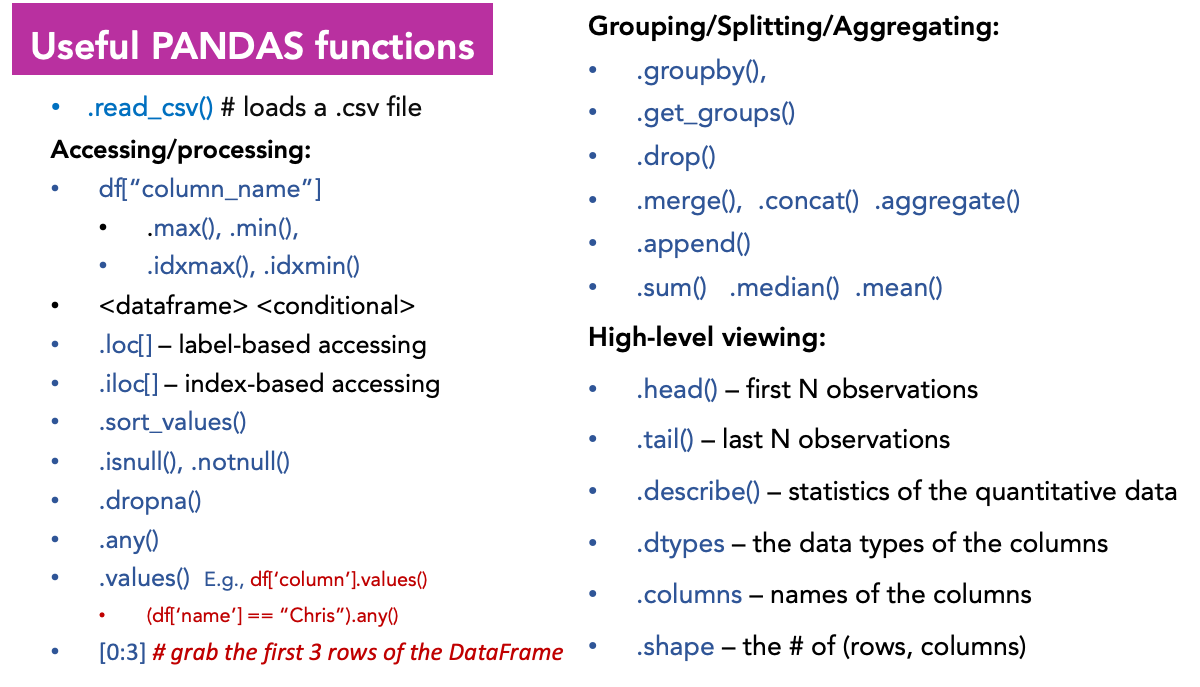

(source: https://harvard-iacs.github.io/2020-CS109A/)

## 7 Other Functions in pandas

### 1- Importing Data



In [ ]:
path = 'movies.csv'
data = pd.read_csv(path)
data

,title,rating,year,runtime
0,Almost Famous,R,2000,122.0
1,American Pie,R,1999,95.0
2,Back to the Future,PG,1985,116.0
3,Blade Runner,R,1982,117.0
4,Blood for Dracula,R,1974,106.0
5,Blue Velvet,R,1986,120.0
6,The Breakfast Club,R,1985,97.0
7,Clueless,PG-13,1995,NaN
8,Cool Hand Luke,GP,1967,127.0
9,The Craft,R,1996,101.0


In [ ]:
pd.read_csv(filename)	From a CSV file

In [ ]:
pd.read_table(filename)	From a delimited text file (like TSV)

In [ ]:
pd.read_excel(filename)	From an Excel file    xlsx format

In [ ]:
pd.read_sql(query, connection_object)	Read from a SQL table/database

In [ ]:
pd.read_json(json_string)	Read from a JSON formatted string, URL or file.

### 2- Viewing/Inspecting Data

In [ ]:
df = data.copy(deep=True)   # copy because not to overwrite orignial data

In [ ]:
# df = data     # Forbidden 

In [ ]:
df.head() #First n rows of the DataFrame

,title,rating,year,runtime
0,Almost Famous,R,2000,122.0
1,American Pie,R,1999,95.0
2,Back to the Future,PG,1985,116.0
3,Blade Runner,R,1982,117.0
4,Blood for Dracula,R,1974,106.0


In [ ]:
df.tail() #Last n rows of the DataFrame

,title,rating,year,runtime
25,Psycho,R,1960,NaN
26,Stand by Me,R,1986,89.0
27,Super 8,PG-13,2011,112.0
28,superbad,R,2007,113.0
29,WarGames,PG,1983,114.0


In [ ]:
df.sample(5)

,title,rating,year,runtime
26,Stand by Me,R,1986,89.0
10,Doctor Zhivago,PG-13,1965,197.0
7,Clueless,PG-13,1995,NaN
1,American Pie,R,1999,95.0
21,Napoleon Dynamite,PG,2004,96.0


In [ ]:
df.shape   #Number of rows and columns

(30, 4)

In [ ]:
df.info() #Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    30 non-null     object 
 1   rating   30 non-null     object 
 2   year     30 non-null     int64  
 3   runtime  28 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [ ]:
df['rating'].value_counts() 

R            12
PG            8
PG-13         6
GP            1
Not Rated     1
NC-17         1
G             1
Name: rating, dtype: int64

In [ ]:
df['rating'].value_counts(normalize =True) 

R            0.400000
PG           0.266667
PG-13        0.200000
GP           0.033333
Not Rated    0.033333
NC-17        0.033333
G            0.033333
Name: rating, dtype: float64

R rating is the most repeated 

task

1- read dataframe

2- display information

3- print last 5 rows

4- print shape of it

### 3- Statistics

In [ ]:
df.sample()

,title,rating,year,runtime
4,Blood for Dracula,R,1974,106.0


In [ ]:
df['rating'].value_counts()

R            12
PG            8
PG-13         6
GP            1
Not Rated     1
NC-17         1
G             1
Name: rating, dtype: int64

In [ ]:
df.describe(include='all')   #Summary statistics for all columns 

,title,rating,year,runtime
count,30,30,30.000000,28.000000
unique,30,7,NaN,NaN
top,Almost Famous,R,NaN,NaN
freq,1,12,NaN,NaN
mean,NaN,NaN,1987.000000,107.285714
std,NaN,NaN,12.406895,21.308766
min,NaN,NaN,1960.000000,85.000000
25%,NaN,NaN,1982.250000,96.750000
50%,NaN,NaN,1986.000000,102.000000
75%,NaN,NaN,1995.750000,114.500000


**Insights**

- 1- title feature has 30 values with 30 unique values
- 2- Rating Feature has 30 values with 7 unique values
- 3- Rating Feature has the most freq value is R with 12 times
- 4- min and max of year feature is 1960 and 2011 respectively.
- 5- runtime feature has 28 values with 2 missing nulls.
- 6- the average of time of movies is almost 107 mintues
- 7- the shortest movie is 85 minute with it is name  .....
- 8- the longest movie with 197 mintue is ..... 

Task  : 

1- find the shortest and longest movie name 

2- which movie is the oldest and newest

In [ ]:
df['runtime'].min()

85.0

In [ ]:
df[ df['runtime'] == df['runtime'].min() ]

,title,rating,year,runtime
12,Evil Dead,NC-17,1981,85.0


In [ ]:
# df['title']

In [ ]:
df[df['runtime'] == df['runtime'].min() ]['title']

12    Evil Dead
Name: title, dtype: object

In [ ]:
df[df['runtime'] == df['runtime'].max() ]['title']

10    Doctor Zhivago
Name: title, dtype: object

In [ ]:
df[df['runtime'] == df['runtime'].max() ][['title','runtime']]

,title,runtime
10,Doctor Zhivago,197.0


In [ ]:
df[df['year'] == df['year'].min() ][['title','year']]

,title,year
25,Psycho,1960


In [ ]:
df[df['year'] == df['year'].max() ][['title','year']]

,title,year
27,Super 8,2011


In [ ]:
df['runtime'].mean()	#Returns the mean of all columns

107.28571428571429

In [ ]:
df['runtime'].count()	#Returns the number of non-null values in each DataFrame column

28

In [ ]:
df['runtime'].max()	#Returns the highest value in each column

197.0

In [ ]:
df['runtime'].min()	#Returns the lowest value in each column

85.0

In [ ]:
df['runtime'].median()	#Returns the median of each column

102.0

In [ ]:
df['runtime'].std()	#Returns the standard deviation of each column

21.308765615668406

In [ ]:
df.corr(numeric_only=True)	#Returns the correlation between columns in a DataFrame

,year,runtime
year,1.000000,-0.450278
runtime,-0.450278,1.000000
